<a href="https://www.kaggle.com/code/mesutssmn/stroke-prediction?scriptVersionId=172476669" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="border-radius:40px; border:#5E5772 solid; padding: 12px; background-color: #FAEBD7; font-size:150%; text-align:left">

<h3 align="center"><font color='#30000' size=150%>STROKE PREDICTION</font></h3>


<h4 align="left"><font color='#30000' size=5%>To Do :</font></h4>
    
<li> Cleaning dataset for classification</li>
    
<li> Some analysis and statistics</li>
    
<li> ML, ANN
    
    
    
<h3 align="left"><font color='#30000' size=5%>ABOUT DATA :</font></h3> 
    
 Stroke is a medical condition in which poor blood flow to the brain causes cell death. There are two main types of stroke: ischemic, due to lack of blood flow, and hemorrhagic, due to bleeding. Both cause parts of the brain to stop functioning properly.
    
 According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
    
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.
    
You can find more information about Stroke [here](https://en.wikipedia.org/wiki/Stroke).    
    
<div style="border-radius: 10px; overflow: hidden; text-align: left;">
    <img src="https://dana.org/app/uploads/2023/09/fs-stroke.jpeg" alt="Red Wine" width="900"></div>
    
    
<div style="border-radius: 10px; overflow: hidden; text-align: right;">
    <img src="https://www.hopkinsmedicine.org/-/media/images/health/1_-conditions/heart-and-vascular/types-of-stroke-teaser-image.jpg" alt="Red Wine" width="900"></div>
</div>



    
   ##### Thank you for taking the time to read. Please don't ignore voting.
    

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #FAEBD7; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> LINKS </div>

#### **Name :** Mesut Suhan Şişman

<div style="text-align: left;">
    <table>
        <tr>
            <th><b>Links</b></th>
        </tr>
        <tr>
        </tr>
        <tr>
            <td>GitHub</td>
            <td><a href="https://github.com/Mesutssmn"><img src="https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github" alt="GitHub"/></a></td>
        </tr>
        <tr>
            <td>LinkedIn</td>
            <td><a href="https://www.linkedin.com/in/mesut-suhan-sisman/"><img src="https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin" alt="LinkedIn"/></a></td>
        </tr>
        <tr>
        </tr>
        <tr>
    </table>

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #FAEBD7; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> IMPORTINGS </div>

In [1]:
# Base Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis Libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer, classification_report,confusion_matrix

# Machine Learning Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

# İgnore Warnings
import warnings
warnings.filterwarnings("ignore")

2024-04-17 11:39:30.289686: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-17 11:39:30.289779: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-17 11:39:30.403620: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 55)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #FAEBD7; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> LOADING DATA </div>

In [3]:
df = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.000,0,1,Yes,Private,Urban,228.690,36.600,formerly smoked,1
1,51676,Female,61.000,0,0,Yes,Self-employed,Rural,202.210,NaN,never smoked,1
2,31112,Male,80.000,0,1,Yes,Private,Rural,105.920,32.500,never smoked,1
3,60182,Female,49.000,0,0,Yes,Private,Urban,171.230,34.400,smokes,1
4,1665,Female,79.000,1,0,Yes,Self-employed,Rural,174.120,24.000,never smoked,1


<div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #FAEBD7; font-size:100%; text-align:center"> 
<p style=" font-size:250% ; text-align:center" > FEATURES </p>



1) ***id*** : unique identifier
    
2) ***gender*** : "Male", "Female" or "Other"
    
3) ***age*** : age of the patient
    
4) ***hypertension***: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
    
5) ***heart_disease***: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
    
6) ***ever_married***: "No" or "Yes"
    
7) ***work_type***: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
    
8) ***Residence_type***: "Rural" or "Urban"
    
9) ***avg_glucose_level***: average glucose level in blood
    
10) ***bmi***: body mass index
    
11) ***smoking_status***: "formerly smoked", "never smoked", "smokes" or "Unknown"*
    
12) ***stroke***: 1 if the patient had a stroke or 0 if not
    
*Note*: "Unknown" in smoking_status means that the information is unavailable for this patient
    
Dataset: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
    

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #FAEBD7; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> DATA INFORMATION AND COLUMN IDENTIFICATION  </div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.000,36517.829,21161.722,67.000,17741.250,36932.000,54682.000,72940.000
age,5110.000,43.227,22.613,0.080,25.000,45.000,61.000,82.000
hypertension,5110.000,0.097,0.297,0.000,0.000,0.000,0.000,1.000
heart_disease,5110.000,0.054,0.226,0.000,0.000,0.000,0.000,1.000
avg_glucose_level,5110.000,106.148,45.284,55.120,77.245,91.885,114.090,271.740
bmi,4909.000,28.893,7.854,10.300,23.500,28.100,33.100,97.600
stroke,5110.000,0.049,0.215,0.000,0.000,0.000,0.000,1.000


In [6]:
df.drop("id", axis = 1, inplace=True)

In [7]:
df["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [8]:
df["Residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [9]:
df["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [10]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 5110
Variables: 11
cat_cols: 8
num_cols: 3
cat_but_car: 0
num_but_cat: 3


In [11]:
cat_cols, num_cols, cat_but_car

(['gender',
  'ever_married',
  'work_type',
  'Residence_type',
  'smoking_status',
  'hypertension',
  'heart_disease',
  'stroke'],
 ['age', 'avg_glucose_level', 'bmi'],
 [])

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #FAEBD7; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> VISUALIZATIONS </div>

        gender  Ratio
gender               
Female    2994 58.591
Male      2115 41.389
Other        1  0.020


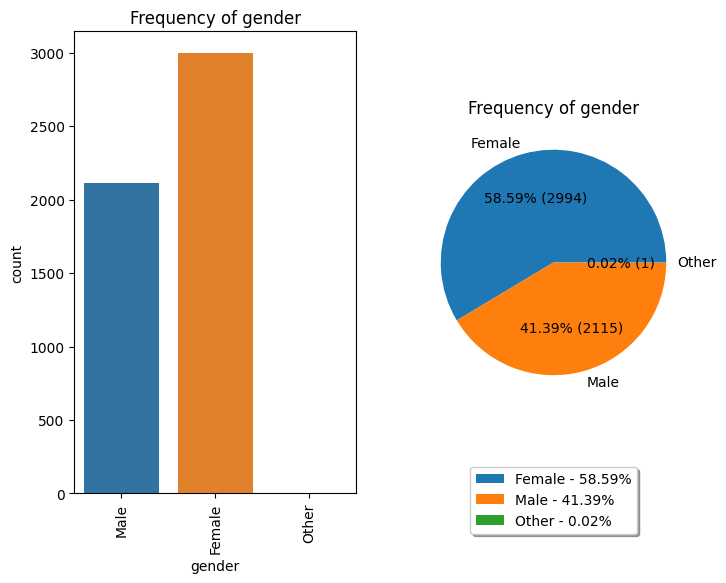

              ever_married  Ratio
ever_married                     
Yes                   3353 65.616
No                    1757 34.384


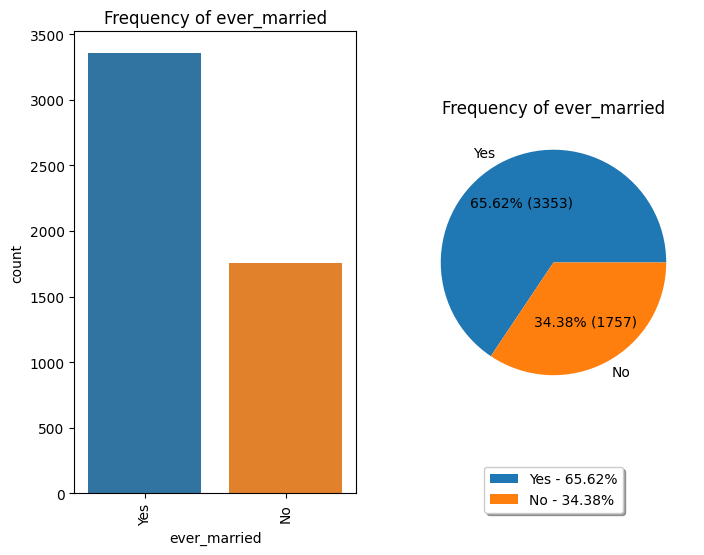

               work_type  Ratio
work_type                      
Private             2925 57.241
Self-employed        819 16.027
children             687 13.444
Govt_job             657 12.857
Never_worked          22  0.431


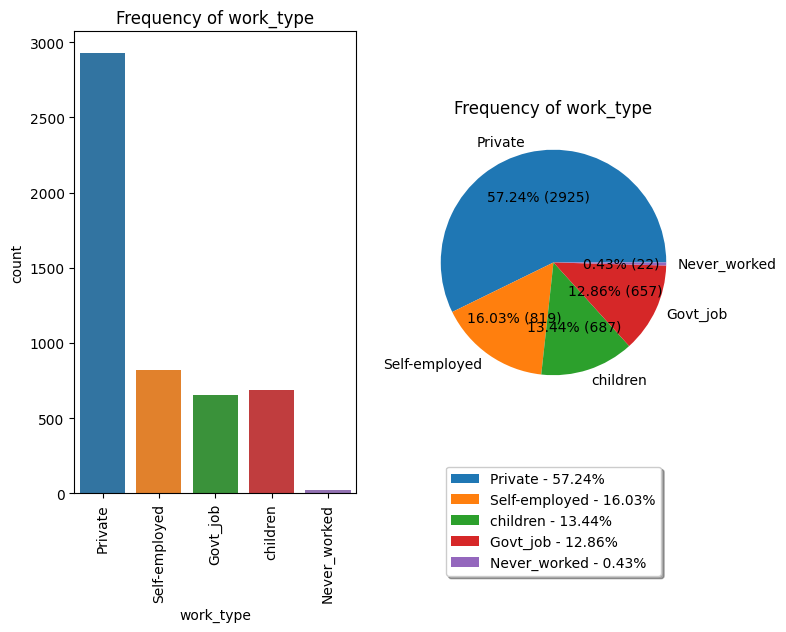

                Residence_type  Ratio
Residence_type                       
Urban                     2596 50.802
Rural                     2514 49.198


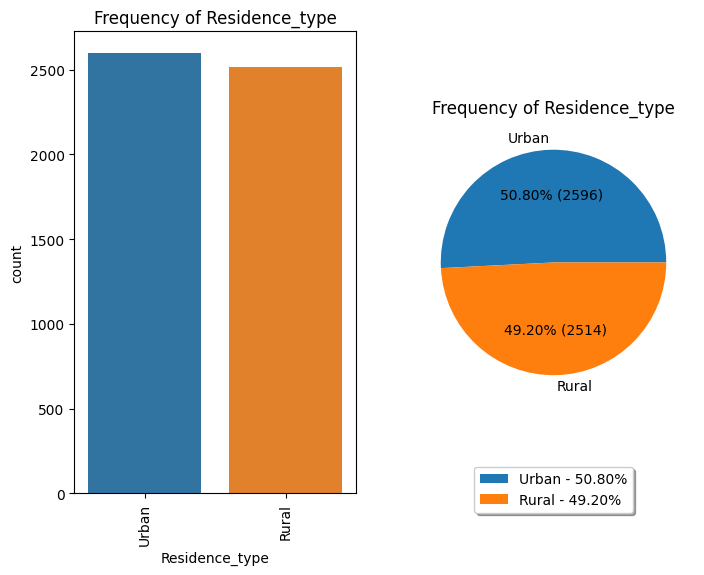

                 smoking_status  Ratio
smoking_status                        
never smoked               1892 37.025
Unknown                    1544 30.215
formerly smoked             885 17.319
smokes                      789 15.440


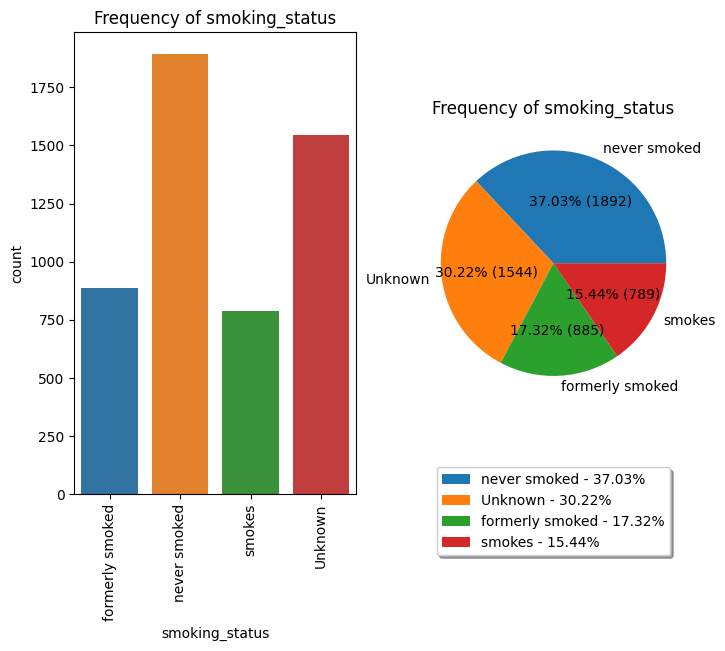

              hypertension  Ratio
hypertension                     
0                     4612 90.254
1                      498  9.746


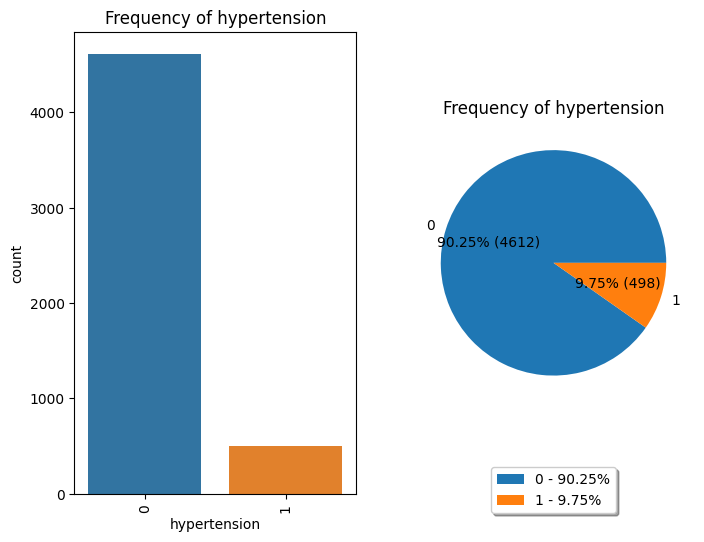

               heart_disease  Ratio
heart_disease                      
0                       4834 94.599
1                        276  5.401


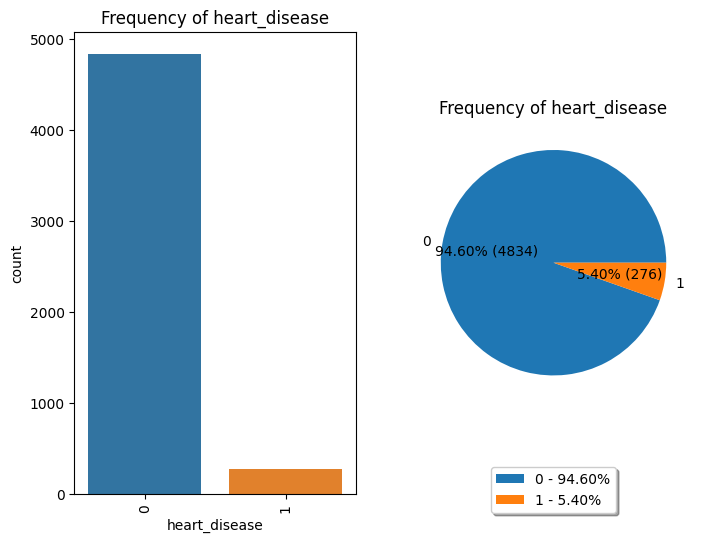

        stroke  Ratio
stroke               
0         4861 95.127
1          249  4.873


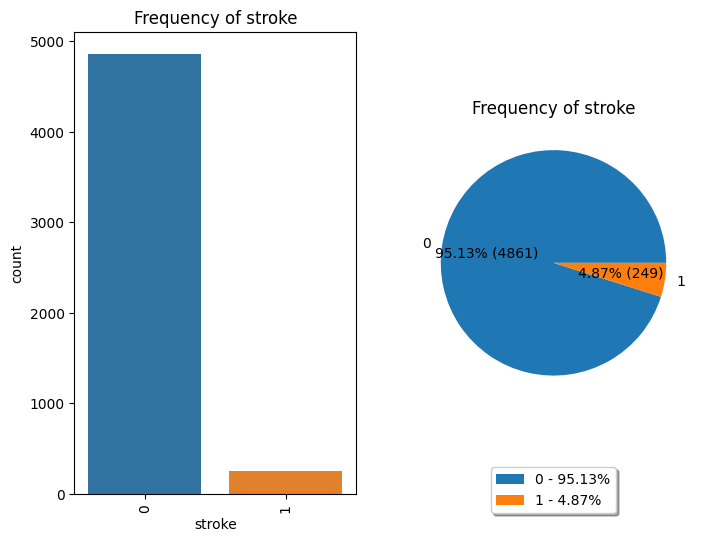

In [12]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(8, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)

        plt.subplot(1, 2, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(df, col, True)

count   5110.000
mean      43.227
std       22.613
min        0.080
5%         5.000
10%       11.000
20%       20.000
30%       30.000
40%       38.000
50%       45.000
60%       51.000
70%       57.000
80%       65.000
90%       75.000
95%       79.000
99%       82.000
max       82.000
Name: age, dtype: float64


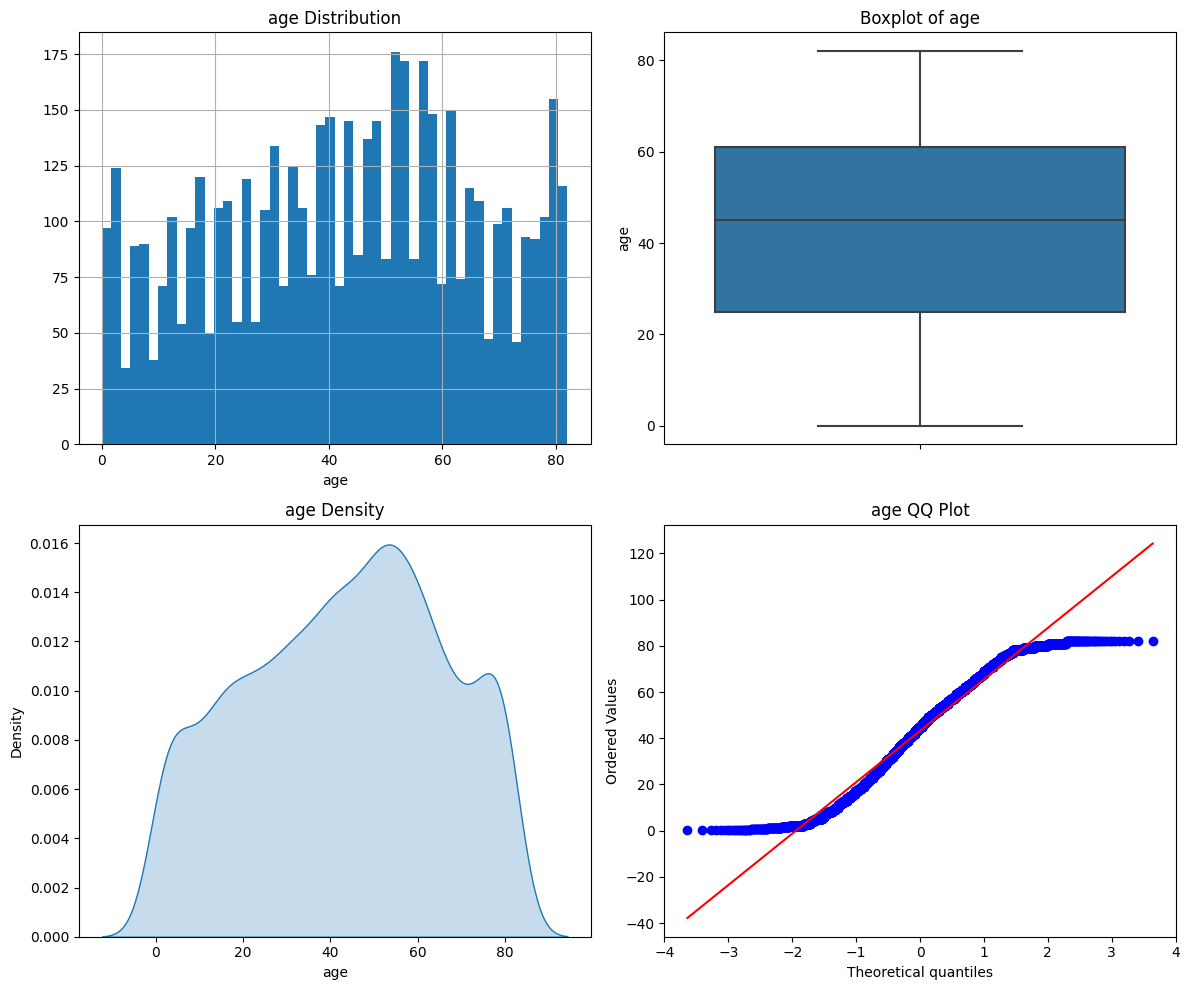

#####################################
count   5110.000
mean     106.148
std       45.284
min       55.120
5%        60.714
10%       65.789
20%       73.760
30%       80.038
40%       85.600
50%       91.885
60%       98.914
70%      108.516
80%      124.160
90%      192.181
95%      216.295
99%      240.708
max      271.740
Name: avg_glucose_level, dtype: float64


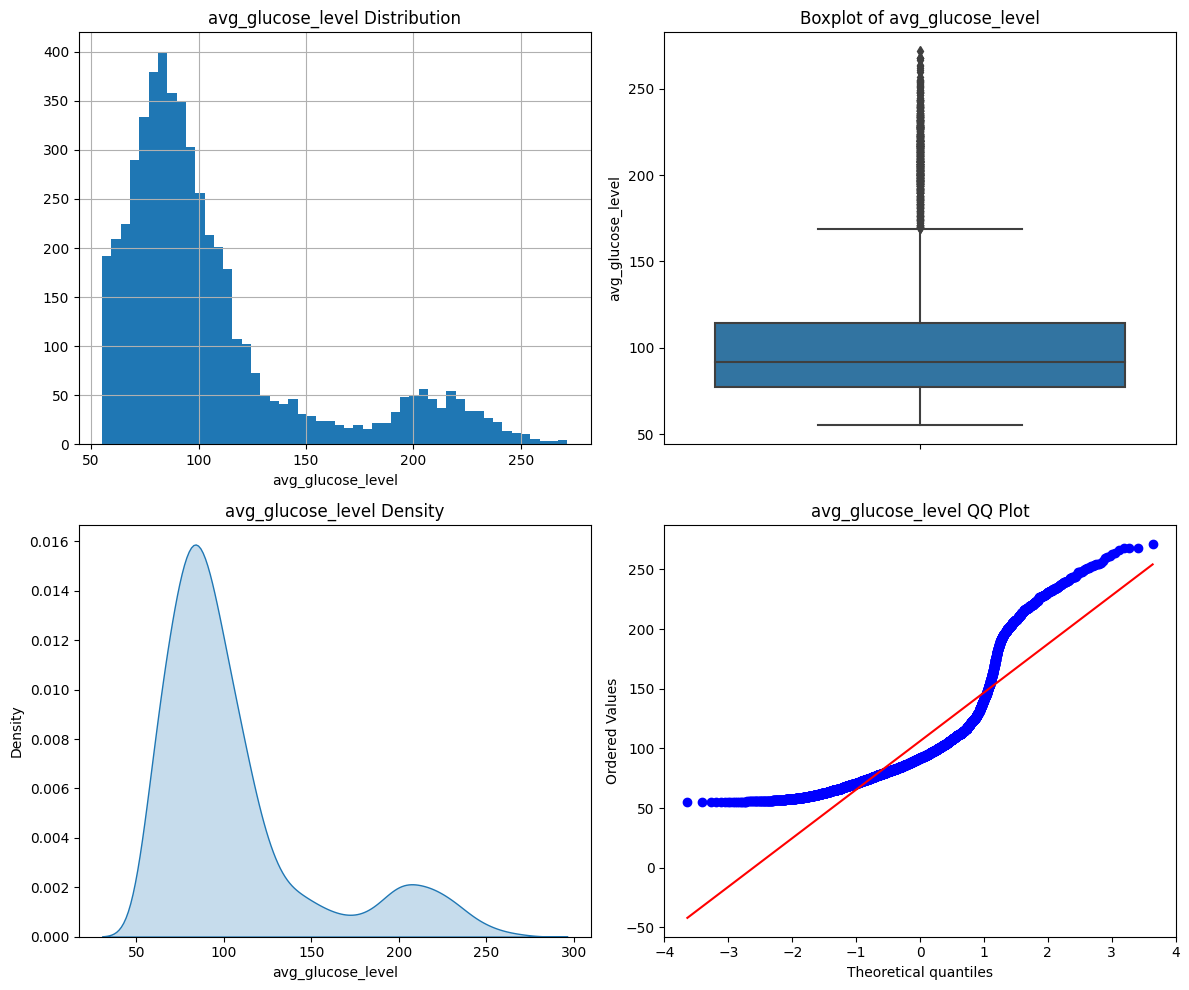

#####################################
count   4909.000
mean      28.893
std        7.854
min       10.300
5%        17.640
10%       19.700
20%       22.500
30%       24.500
40%       26.400
50%       28.100
60%       29.800
70%       31.900
80%       34.500
90%       38.900
95%       42.960
99%       53.400
max       97.600
Name: bmi, dtype: float64


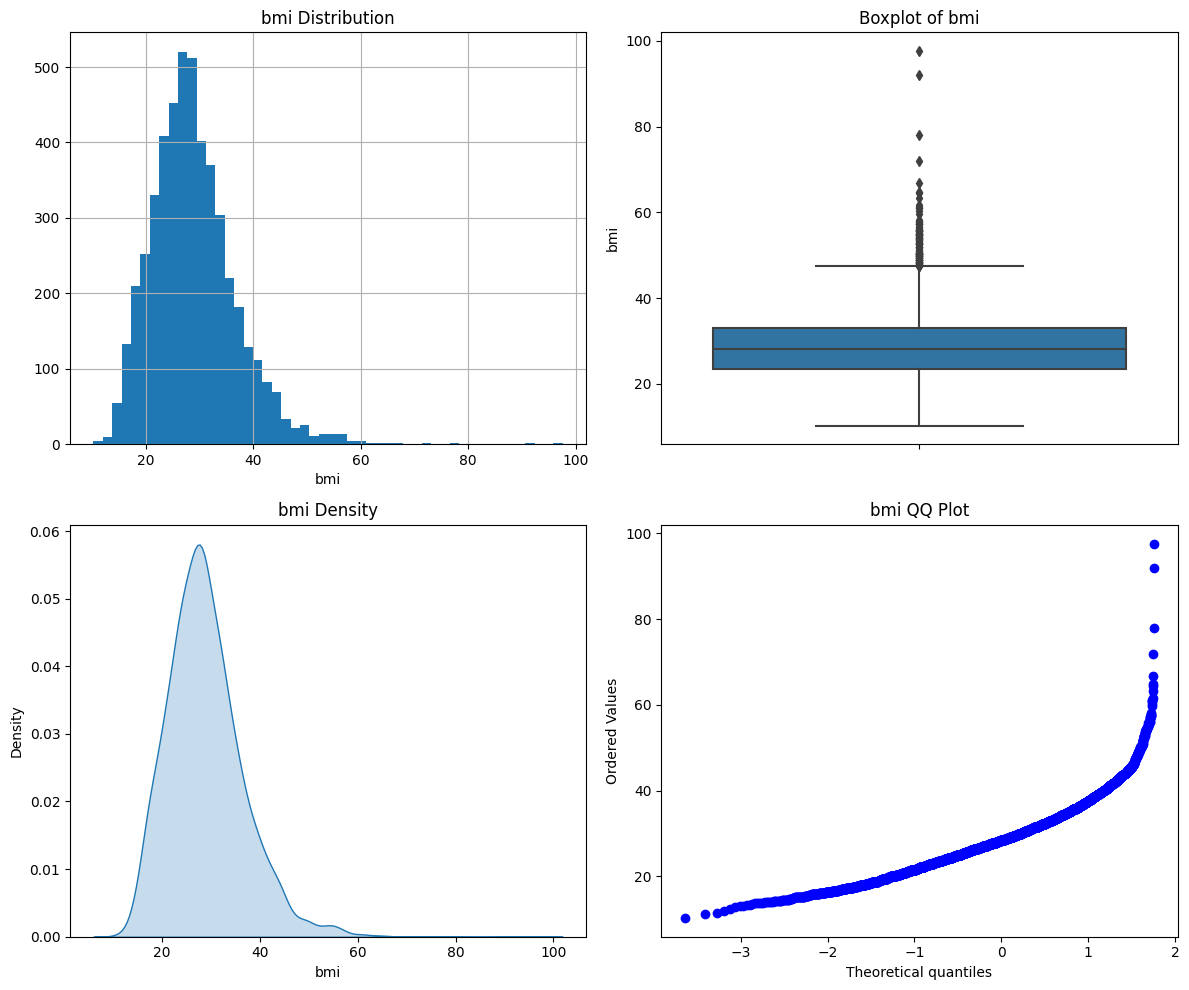

#####################################


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    
    if plot:
        fig, axs = plt.subplots(2, 2, figsize=(12, 10))
        
        # Histogram
        plt.subplot(2, 2, 1)
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col + ' Distribution')
        
        # Boxplot
        plt.subplot(2, 2, 2)
        sns.boxplot(y=numerical_col, data=dataframe)
        plt.title("Boxplot of " + numerical_col)
        plt.xticks(rotation=90)
        
        # Density Plot
        plt.subplot(2, 2, 3)
        sns.kdeplot(dataframe[numerical_col], shade=True)
        plt.xlabel(numerical_col)
        plt.title(numerical_col + ' Density')
        
        # QQ Plot
        plt.subplot(2, 2, 4)
        stats.probplot(dataframe[numerical_col], dist="norm", plot=plt)
        plt.title(numerical_col + ' QQ Plot')
        
        plt.tight_layout()
        plt.show(block=True)
        
    print("#####################################")

for col in num_cols:
    num_summary(df, col, plot=True)

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #FAEBD7; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> DATA ANALYSIS </div>

In [14]:
df.sample()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2168,Male,55.000,0,0,Yes,Private,Urban,203.810,33.900,formerly smoked,0


In [15]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [16]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(df, "stroke", col)

          age
stroke       
0      41.972
1      67.728


        avg_glucose_level
stroke                   
0                 104.796
1                 132.545


          bmi
stroke       
0      28.823
1      30.471




In [17]:
df["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

## <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #FAEBD7; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> FIRST ML TRYING WITHOUT CLEANING </div>

In [18]:
dfd = pd.get_dummies(df, ['gender','ever_married', 'work_type','Residence_type', 'smoking_status'], drop_first = True)

In [19]:
dfd.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.000,0,1,228.690,36.600,1,True,False,True,False,True,False,False,True,True,False,False
1,61.000,0,0,202.210,NaN,1,False,False,True,False,False,True,False,False,False,True,False
2,80.000,0,1,105.920,32.500,1,True,False,True,False,True,False,False,False,False,True,False
3,49.000,0,0,171.230,34.400,1,False,False,True,False,True,False,False,True,False,False,True
4,79.000,1,0,174.120,24.000,1,False,False,True,False,False,True,False,False,False,True,False


In [20]:
dfd[["age","gender_Male","gender_Other","ever_married_Yes","work_type_Never_worked","work_type_Private","work_type_Self-employed","work_type_children","Residence_type_Urban","smoking_status_formerly smoked","smoking_status_never smoked",
"smoking_status_smokes"]] = dfd[["age","gender_Male","gender_Other","ever_married_Yes","work_type_Never_worked","work_type_Private","work_type_Self-employed","work_type_children","Residence_type_Urban","smoking_status_formerly smoked","smoking_status_never smoked",
"smoking_status_smokes"]].astype(int)

In [21]:
dfd.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228.690,36.600,1,1,0,1,0,1,0,0,1,1,0,0
1,61,0,0,202.210,NaN,1,0,0,1,0,0,1,0,0,0,1,0
2,80,0,1,105.920,32.500,1,1,0,1,0,1,0,0,0,0,1,0
3,49,0,0,171.230,34.400,1,0,0,1,0,1,0,0,1,0,0,1
4,79,1,0,174.120,24.000,1,0,0,1,0,0,1,0,0,0,1,0


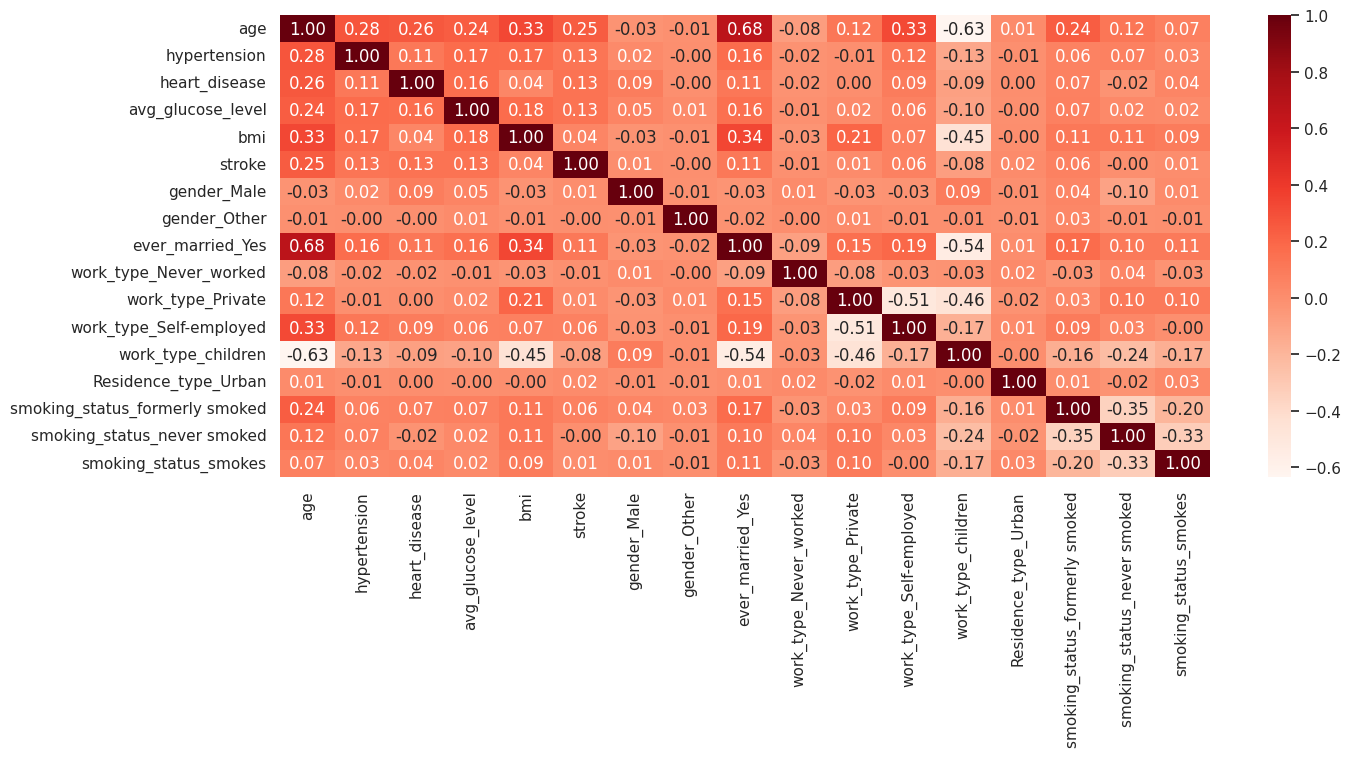

In [22]:
corr = dfd.corr()
sns.set(rc={'figure.figsize': (15, 6)})
sns.heatmap(corr, cmap="Reds", annot=True, fmt=".2f")
plt.show()

In [23]:
df_rf = dfd.dropna()

In [24]:
y = df_rf["stroke"]
X = df_rf.drop("stroke", axis=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [26]:
rf_model.score(X_train, y_train)

0.9997283346916599

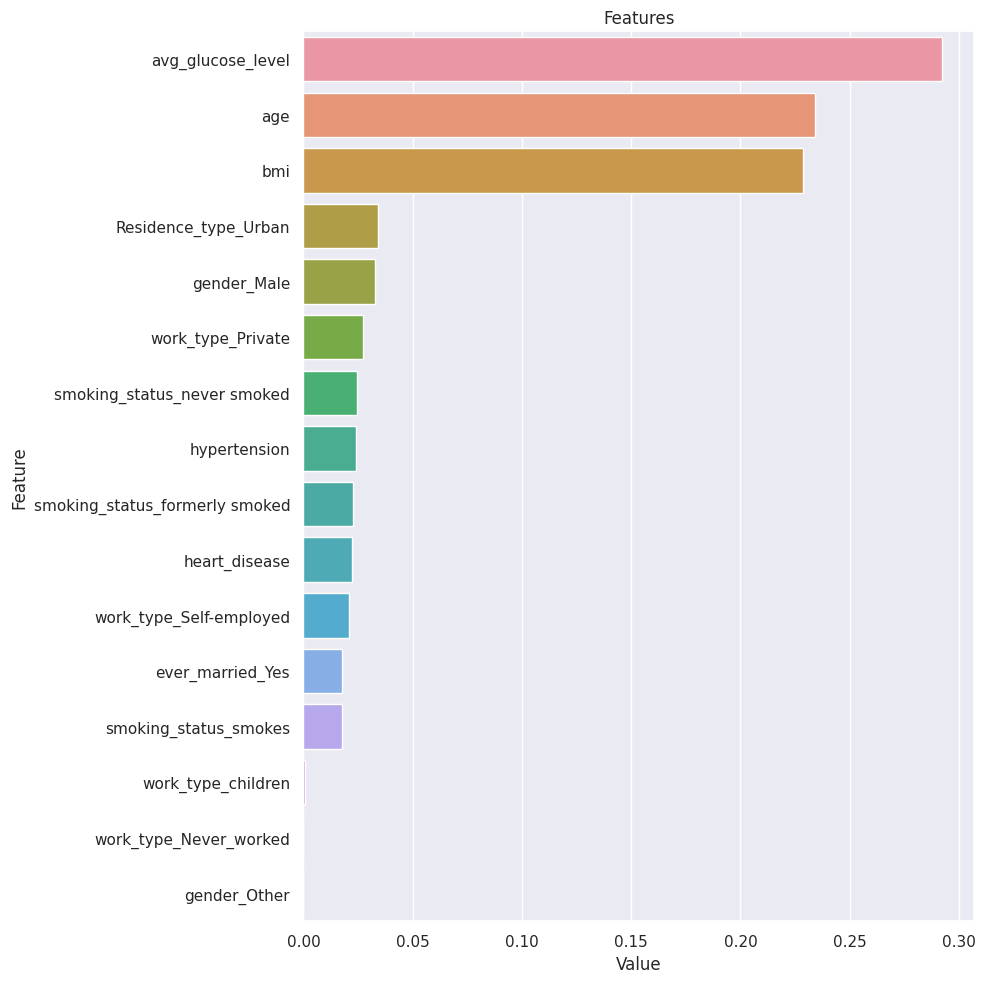

In [27]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_model, X)

In [28]:
y_pred_rf = rf_model.predict(X_test)

rf_accuracy=round(accuracy_score(y_test,y_pred_rf), 4)*100
rf_accuracy

94.87

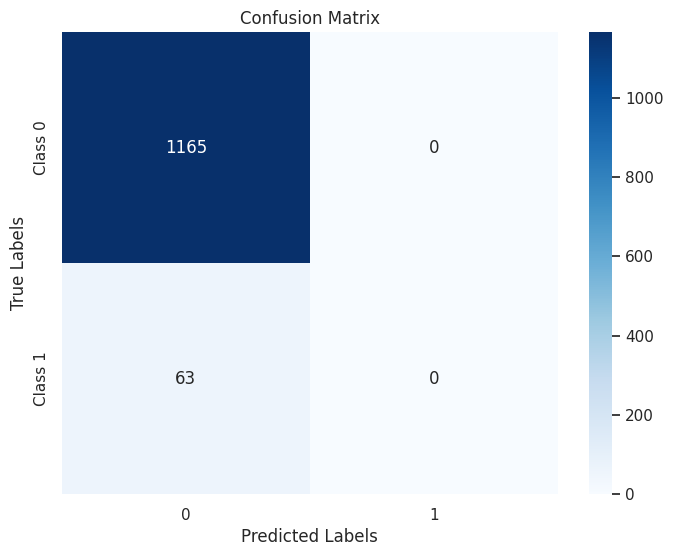

In [29]:
cm = confusion_matrix(y_test, y_pred_rf)

class_labels = ['Class 0', 'Class 1']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [30]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1165
           1       0.00      0.00      0.00        63

    accuracy                           0.95      1228
   macro avg       0.47      0.50      0.49      1228
weighted avg       0.90      0.95      0.92      1228



## <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #FAEBD7; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> FEATURE EXTRACTION </div>

In [31]:
df.sample()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3331,Male,5.000,0,0,No,children,Urban,101.610,33.100,Unknown,0


In [32]:
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 65, np.inf], labels=['<18', '18-35', '36-50', '51-65', '65+'])

# BMI Category
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, np.inf], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Glucose Level Category
df['glucose_level_category'] = pd.cut(df['avg_glucose_level'], bins=[0, 70, 100, np.inf], labels=['Low', 'Normal', 'High'])

# Smoking Status Binary
df['smoking_binary'] = df['smoking_status'].apply(lambda x: 1 if x in ['formerly smoked', 'smokes'] else 0)

# Age x BMI Interaction
df['age_bmi_interaction'] = df['age'] * df['bmi']

# Health Risk Score
df['health_risk_score'] = df['hypertension'] + df['heart_disease'] + df['smoking_binary'] + df['age'] / 100

# Work Type and Residence Interaction
df['work_residence_interaction'] = df['work_type'] + "_" + df['Residence_type']

# Marital Status and Age Interaction
df['marital_age_interaction'] = df['ever_married'].map({'Yes': 1, 'No': 0}) * df['age']

## <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #FAEBD7; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> HANDLINGS WITH OUTLIERS & NAN VALUES </div>

In [33]:
df.sample()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_category,glucose_level_category,smoking_binary,age_bmi_interaction,health_risk_score,work_residence_interaction,marital_age_interaction
3097,Male,1.320,0,0,No,children,Urban,56.110,22.900,Unknown,0,<18,Normal,Low,0,30.228,0.013,children_Urban,0.000


In [34]:
df = pd.get_dummies(df, ["gender", "ever_married", "work_type", "Residence_type", "smoking_status", "age_group", "bmi_category", "glucose_level_category", "work_residence_interaction"], drop_first=True)

In [35]:
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

In [36]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,smoking_binary,age_bmi_interaction,health_risk_score,marital_age_interaction,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group_18-35,age_group_36-50,age_group_51-65,age_group_65+,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese,glucose_level_category_Normal,glucose_level_category_High,work_residence_interaction_Govt_job_Urban,work_residence_interaction_Never_worked_Rural,work_residence_interaction_Never_worked_Urban,work_residence_interaction_Private_Rural,work_residence_interaction_Private_Urban,work_residence_interaction_Self-employed_Rural,work_residence_interaction_Self-employed_Urban,work_residence_interaction_children_Rural,work_residence_interaction_children_Urban
0,67.000,0,1,228.690,36.600,1,1,2452.200,2.670,67.000,1,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0
1,61.000,0,0,202.210,NaN,1,0,NaN,0.610,61.000,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,80.000,0,1,105.920,32.500,1,0,2600.000,1.800,80.000,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0
3,49.000,0,0,171.230,34.400,1,1,1685.600,1.490,49.000,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,79.000,1,0,174.120,24.000,1,0,1896.000,1.790,79.000,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [37]:
def outlier_thresholds(dataframe, col_name, q1=0.02, q3=0.98):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [38]:
for col in df.columns:
    print(col, check_outlier(df, col))
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

age False
hypertension False
heart_disease False
avg_glucose_level False
bmi True
stroke False
smoking_binary False
age_bmi_interaction False
health_risk_score False
marital_age_interaction False
gender_Male False
gender_Other True
ever_married_Yes False
work_type_Never_worked True
work_type_Private False
work_type_Self-employed False
work_type_children False
Residence_type_Urban False
smoking_status_formerly smoked False
smoking_status_never smoked False
smoking_status_smokes False
age_group_18-35 False
age_group_36-50 False
age_group_51-65 False
age_group_65+ False
bmi_category_Normal False
bmi_category_Overweight False
bmi_category_Obese False
glucose_level_category_Normal False
glucose_level_category_High False
work_residence_interaction_Govt_job_Urban False
work_residence_interaction_Never_worked_Rural True
work_residence_interaction_Never_worked_Urban True
work_residence_interaction_Private_Rural False
work_residence_interaction_Private_Urban False
work_residence_interaction_Self

In [39]:
for col in df.columns:
    print(col, check_outlier(df, col))

age False
hypertension False
heart_disease False
avg_glucose_level False
bmi False
stroke False
smoking_binary False
age_bmi_interaction False
health_risk_score False
marital_age_interaction False
gender_Male False
gender_Other False
ever_married_Yes False
work_type_Never_worked False
work_type_Private False
work_type_Self-employed False
work_type_children False
Residence_type_Urban False
smoking_status_formerly smoked False
smoking_status_never smoked False
smoking_status_smokes False
age_group_18-35 False
age_group_36-50 False
age_group_51-65 False
age_group_65+ False
bmi_category_Normal False
bmi_category_Overweight False
bmi_category_Obese False
glucose_level_category_Normal False
glucose_level_category_High False
work_residence_interaction_Govt_job_Urban False
work_residence_interaction_Never_worked_Rural False
work_residence_interaction_Never_worked_Urban False
work_residence_interaction_Private_Rural False
work_residence_interaction_Private_Urban False
work_residence_interaction

In [40]:
df.fillna(df.mean(), inplace=True)

In [41]:
df.columns = [col.upper() for col in df.columns]

df.head()

,AGE,HYPERTENSION,HEART_DISEASE,AVG_GLUCOSE_LEVEL,BMI,STROKE,SMOKING_BINARY,AGE_BMI_INTERACTION,HEALTH_RISK_SCORE,MARITAL_AGE_INTERACTION,GENDER_MALE,GENDER_OTHER,EVER_MARRIED_YES,WORK_TYPE_NEVER_WORKED,WORK_TYPE_PRIVATE,WORK_TYPE_SELF-EMPLOYED,WORK_TYPE_CHILDREN,RESIDENCE_TYPE_URBAN,SMOKING_STATUS_FORMERLY SMOKED,SMOKING_STATUS_NEVER SMOKED,SMOKING_STATUS_SMOKES,AGE_GROUP_18-35,AGE_GROUP_36-50,AGE_GROUP_51-65,AGE_GROUP_65+,BMI_CATEGORY_NORMAL,BMI_CATEGORY_OVERWEIGHT,BMI_CATEGORY_OBESE,GLUCOSE_LEVEL_CATEGORY_NORMAL,GLUCOSE_LEVEL_CATEGORY_HIGH,WORK_RESIDENCE_INTERACTION_GOVT_JOB_URBAN,WORK_RESIDENCE_INTERACTION_NEVER_WORKED_RURAL,WORK_RESIDENCE_INTERACTION_NEVER_WORKED_URBAN,WORK_RESIDENCE_INTERACTION_PRIVATE_RURAL,WORK_RESIDENCE_INTERACTION_PRIVATE_URBAN,WORK_RESIDENCE_INTERACTION_SELF-EMPLOYED_RURAL,WORK_RESIDENCE_INTERACTION_SELF-EMPLOYED_URBAN,WORK_RESIDENCE_INTERACTION_CHILDREN_RURAL,WORK_RESIDENCE_INTERACTION_CHILDREN_URBAN
0,67.000,0,1,228.690,36.600,1,1,2452.200,2.670,67.000,1,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0
1,61.000,0,0,202.210,28.888,1,0,1297.569,0.610,61.000,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,80.000,0,1,105.920,32.500,1,0,2600.000,1.800,80.000,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0
3,49.000,0,0,171.230,34.400,1,1,1685.600,1.490,49.000,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,79.000,1,0,174.120,24.000,1,0,1896.000,1.790,79.000,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [42]:
df.STROKE.value_counts()

STROKE
0    4861
1     249
Name: count, dtype: int64

In [43]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 5110
Variables: 39
cat_cols: 33
num_cols: 6
cat_but_car: 0
num_but_cat: 33


In [44]:
y = df["STROKE"]
X = df.drop("STROKE", axis=1)

## <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #FAEBD7; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> SCALING </div>

In [45]:
scaler = MinMaxScaler()
df[["AGE","AVG_GLUCOSE_LEVEL","BMI","AGE_BMI_INTERACTION","HEALTH_RISK_SCORE","HEALTH_RISK_SCORE"]] = scaler.fit_transform(df[["AGE","AVG_GLUCOSE_LEVEL","BMI","AGE_BMI_INTERACTION","HEALTH_RISK_SCORE","HEALTH_RISK_SCORE"]])

df.head()

,AGE,HYPERTENSION,HEART_DISEASE,AVG_GLUCOSE_LEVEL,BMI,STROKE,SMOKING_BINARY,AGE_BMI_INTERACTION,HEALTH_RISK_SCORE,MARITAL_AGE_INTERACTION,GENDER_MALE,GENDER_OTHER,EVER_MARRIED_YES,WORK_TYPE_NEVER_WORKED,WORK_TYPE_PRIVATE,WORK_TYPE_SELF-EMPLOYED,WORK_TYPE_CHILDREN,RESIDENCE_TYPE_URBAN,SMOKING_STATUS_FORMERLY SMOKED,SMOKING_STATUS_NEVER SMOKED,SMOKING_STATUS_SMOKES,AGE_GROUP_18-35,AGE_GROUP_36-50,AGE_GROUP_51-65,AGE_GROUP_65+,BMI_CATEGORY_NORMAL,BMI_CATEGORY_OVERWEIGHT,BMI_CATEGORY_OBESE,GLUCOSE_LEVEL_CATEGORY_NORMAL,GLUCOSE_LEVEL_CATEGORY_HIGH,WORK_RESIDENCE_INTERACTION_GOVT_JOB_URBAN,WORK_RESIDENCE_INTERACTION_NEVER_WORKED_RURAL,WORK_RESIDENCE_INTERACTION_NEVER_WORKED_URBAN,WORK_RESIDENCE_INTERACTION_PRIVATE_RURAL,WORK_RESIDENCE_INTERACTION_PRIVATE_URBAN,WORK_RESIDENCE_INTERACTION_SELF-EMPLOYED_RURAL,WORK_RESIDENCE_INTERACTION_SELF-EMPLOYED_URBAN,WORK_RESIDENCE_INTERACTION_CHILDREN_RURAL,WORK_RESIDENCE_INTERACTION_CHILDREN_URBAN
0,0.817,0,1,0.801,0.372,1,1,0.607,0.699,67.000,1,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0
1,0.744,0,0,0.679,0.263,1,0,0.321,0.160,61.000,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,0.976,0,1,0.235,0.314,1,0,0.643,0.471,80.000,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0
3,0.597,0,0,0.536,0.341,1,1,0.417,0.390,49.000,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,0.963,1,0,0.549,0.194,1,0,0.469,0.468,79.000,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0


# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #FAEBD7; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> ML MODELLING </div>

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [47]:
unique, counts = np.unique(y_test, return_counts=True)
for value, count in zip(unique, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 960
Value: 1, Count: 62


In [48]:
rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")

Accuracy: 0.94


    Value                                         Feature
3   0.140                               AVG_GLUCOSE_LEVEL
6   0.134                             AGE_BMI_INTERACTION
4   0.117                                             BMI
7   0.107                               HEALTH_RISK_SCORE
0   0.098                                             AGE
8   0.085                         MARITAL_AGE_INTERACTION
9   0.026                                     GENDER_MALE
18  0.020                     SMOKING_STATUS_NEVER SMOKED
1   0.019                                    HYPERTENSION
23  0.017                                   AGE_GROUP_65+
25  0.017                         BMI_CATEGORY_OVERWEIGHT
28  0.015                     GLUCOSE_LEVEL_CATEGORY_HIGH
27  0.015                   GLUCOSE_LEVEL_CATEGORY_NORMAL
32  0.015        WORK_RESIDENCE_INTERACTION_PRIVATE_RURAL
33  0.015        WORK_RESIDENCE_INTERACTION_PRIVATE_URBAN
2   0.015                                   HEART_DISEASE
17  0.014     

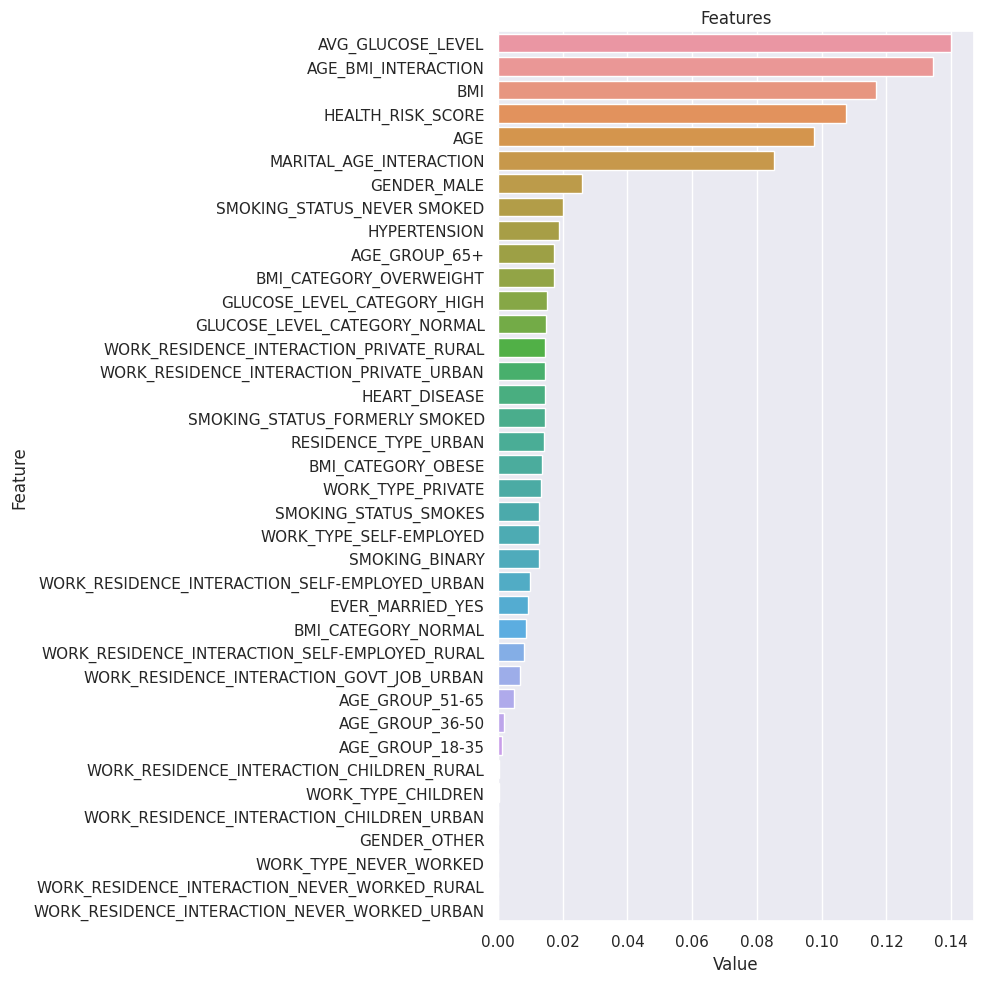

In [49]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    print(feature_imp.sort_values("Value",ascending=False))
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_model, X)

In [50]:
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('SVC', SVC()),
          ('GBM', GradientBoostingClassifier()),
          ("XGBoost", XGBClassifier()),
          ("LightGBM", LGBMClassifier(verbose=-1)),
          ("CatBoost", CatBoostClassifier(verbose=False))]

In [51]:
acclist=[]
for name, model in models:
    acc = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy"))
    acclist.append([name,acc])
    print(f"ACC: {round(acc, 4)} ({name}) ")

ACC: 0.954 (LR) 
ACC: 0.9494 (KNN) 
ACC: 0.9144 (CART) 
ACC: 0.9543 (RF) 
ACC: 0.9543 (SVC) 
ACC: 0.9513 (GBM) 
ACC: 0.944 (XGBoost) 
ACC: 0.9506 (LightGBM) 
ACC: 0.9528 (CatBoost) 


## <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #FAEBD7; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> LIGHTGBM </div>

In [52]:
lgbm = LGBMClassifier(verbose = -1)
lgbm_model = lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)

lgbm_accuracy=round(accuracy_score(y_test,y_pred), 4)*100
lgbm_accuracy

94.13

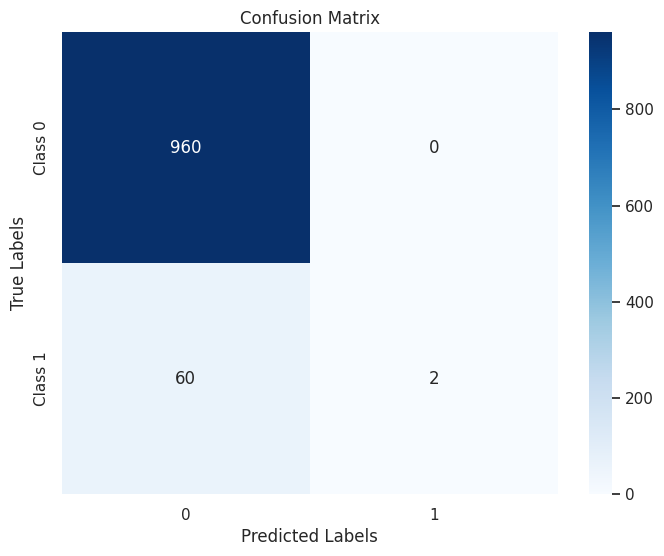

In [53]:
cm = confusion_matrix(y_test, y_pred)

class_labels = ['Class 0', 'Class 1']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.03      0.06        62

    accuracy                           0.94      1022
   macro avg       0.97      0.52      0.52      1022
weighted avg       0.94      0.94      0.91      1022



    Value                                         Feature
3     709                               AVG_GLUCOSE_LEVEL
4     548                                             BMI
6     445                             AGE_BMI_INTERACTION
7     431                               HEALTH_RISK_SCORE
0     262                                             AGE
8     152                         MARITAL_AGE_INTERACTION
9      53                                     GENDER_MALE
18     51                     SMOKING_STATUS_NEVER SMOKED
17     38                  SMOKING_STATUS_FORMERLY SMOKED
16     34                            RESIDENCE_TYPE_URBAN
2      29                                   HEART_DISEASE
13     28                               WORK_TYPE_PRIVATE
1      24                                    HYPERTENSION
33     23        WORK_RESIDENCE_INTERACTION_PRIVATE_URBAN
32     22        WORK_RESIDENCE_INTERACTION_PRIVATE_RURAL
19     22                           SMOKING_STATUS_SMOKES
25     20     

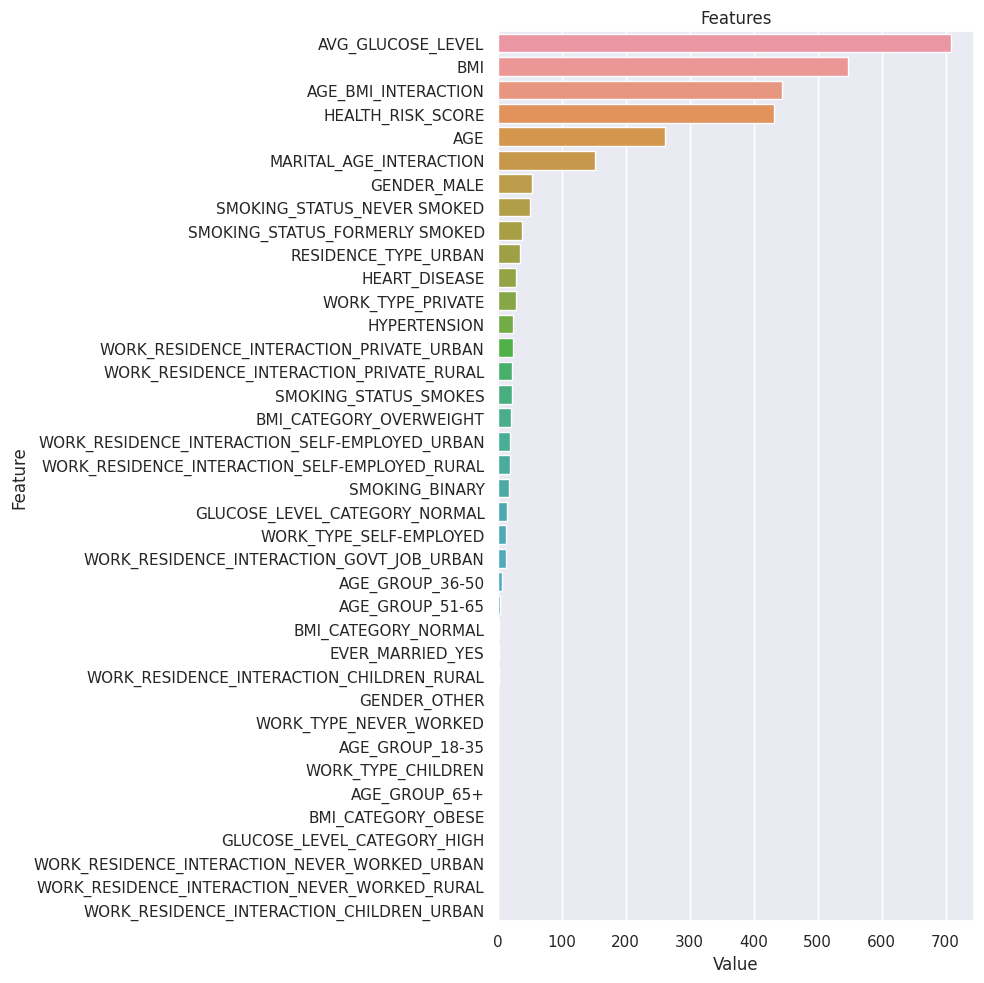

In [55]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    print(feature_imp.sort_values("Value",ascending=False))
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(lgbm_model, X)

## <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #FAEBD7; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> LGBM & SMOTE </div>

In [56]:

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

class_weights = class_weight.compute_class_weight('balanced', classes=[0, 1], y=y_train_resampled)

sample_weights = np.where(y_train_resampled == 0, class_weights[0], class_weights[1])

# Create Gradient Boosting Classifier
clf = LGBMClassifier(verbose = -1, random_state=42)

# Fit the model with sample weights
clf.fit(X_train_resampled, y_train_resampled, sample_weight=sample_weights)

# Predict on test set
y_pred = clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.31      0.06      0.11        62

    accuracy                           0.93      1022
   macro avg       0.63      0.53      0.54      1022
weighted avg       0.90      0.93      0.91      1022



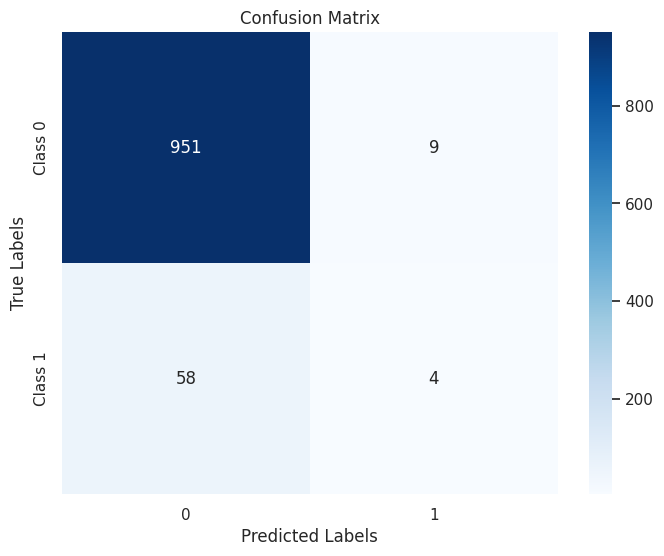

In [57]:
cm = confusion_matrix(y_test, y_pred)

class_labels = ['Class 0', 'Class 1']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [58]:
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [4, 5, 6],
    'min_samples_split': [2, 3, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=[0, 1], y=y_train_resampled)

# Convert class weights to sample weights
sample_weights = np.where(y_train_resampled == 0, class_weights[0], class_weights[1])

# Create Gradient Boosting Classifier
clf = LGBMClassifier(verbose = -1, random_state=42)

# Create GridSearchCV object with custom scoring for recall
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring=make_scorer(recall_score, pos_label=1), n_jobs=1)

# Fit the GridSearchCV object with sample weights
grid_search.fit(X_train_resampled, y_train_resampled, sample_weight=sample_weights)

# Get the best estimator
best_clf = grid_search.best_estimator_
best_clf


LGBMClassifier(learning_rate=0.05, max_depth=6, min_samples_split=2,
               random_state=42, subsample=0.8, verbose=-1)

In [59]:
y_pred = best_clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       960
           1       0.25      0.13      0.17        62

    accuracy                           0.92      1022
   macro avg       0.60      0.55      0.57      1022
weighted avg       0.90      0.92      0.91      1022



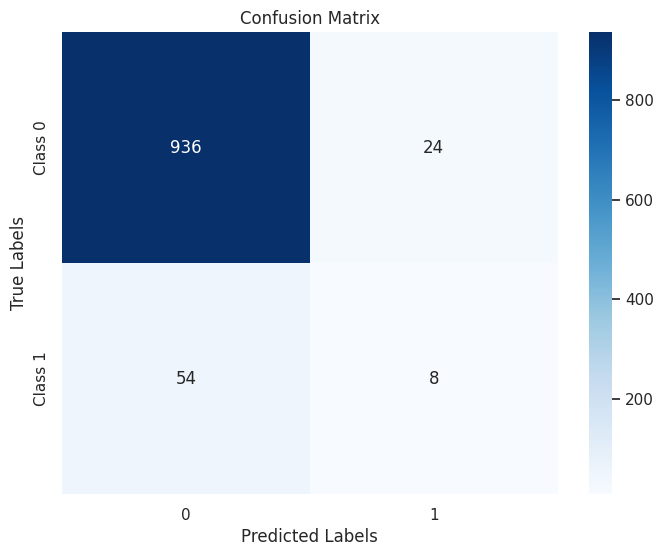

In [60]:
cm = confusion_matrix(y_test, y_pred)

class_labels = ['Class 0', 'Class 1']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #FAEBD7; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> CATBOOST </div>

In [61]:
cat = CatBoostClassifier(learning_rate = 0.05, verbose =False)
cat_model = cat.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

cat_accuracy=round(accuracy_score(y_test,y_pred), 4)*100
cat_accuracy

92.36999999999999

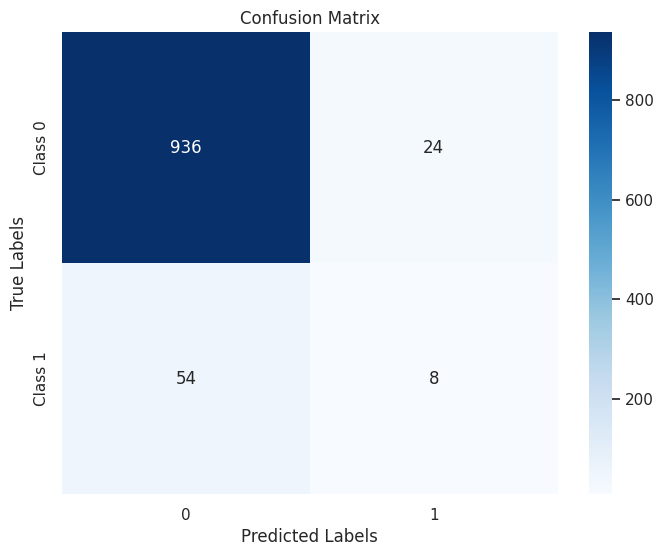

In [62]:
cm = confusion_matrix(y_test, y_pred)

class_labels = ['Class 0', 'Class 1']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       960
           1       0.25      0.13      0.17        62

    accuracy                           0.92      1022
   macro avg       0.60      0.55      0.57      1022
weighted avg       0.90      0.92      0.91      1022



    Value                                         Feature
3  14.733                               AVG_GLUCOSE_LEVEL
4  14.512                                             BMI
6  13.497                             AGE_BMI_INTERACTION
7   9.651                               HEALTH_RISK_SCORE
8   7.752                         MARITAL_AGE_INTERACTION
0   5.809                                             AGE
9   4.100                                     GENDER_MALE
18  3.225                     SMOKING_STATUS_NEVER SMOKED
20  2.301                                 AGE_GROUP_18-35
33  1.942        WORK_RESIDENCE_INTERACTION_PRIVATE_URBAN
32  1.726        WORK_RESIDENCE_INTERACTION_PRIVATE_RURAL
23  1.696                                   AGE_GROUP_65+
25  1.631                         BMI_CATEGORY_OVERWEIGHT
19  1.369                           SMOKING_STATUS_SMOKES
13  1.307                               WORK_TYPE_PRIVATE
29  1.239       WORK_RESIDENCE_INTERACTION_GOVT_JOB_URBAN
16  1.229     

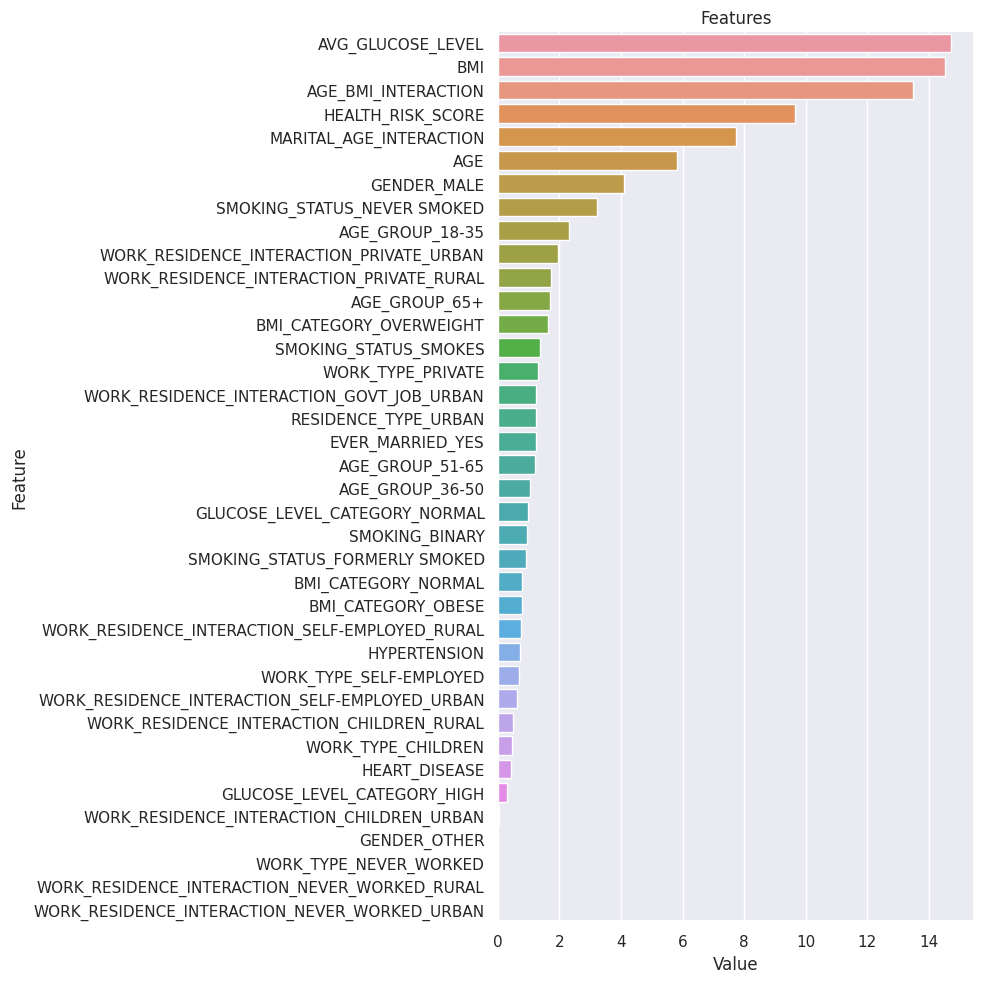

In [64]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    print(feature_imp.sort_values("Value",ascending=False))
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(cat_model, X)

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #FAEBD7; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> ANN MODELLING </div>

In [65]:
X_train.shape[1]

38

In [66]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, input_shape=(X_train.shape[1],), activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(1024, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(1024, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(512, activation="elu", kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(128, activation="leaky_relu", kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(32, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(8, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=5,
    restore_best_weights=True)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        19,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,189,745 (8.35 MB)

 Trainable params: 2,189,745 (8.35 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=18,
                    batch_size=64,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/18
41/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9080 - loss: 5.4263

I0000 00:00:1713354263.469451     114 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


52/52 ━━━━━━━━━━━━━━━━━━━━ 25s 232ms/step - accuracy: 0.9162 - loss: 5.3446 - val_accuracy: 0.9548 - val_loss: 2.0138
Epoch 2/18
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9520 - loss: 1.3248 - val_accuracy: 0.9548 - val_loss: 0.3098
Epoch 3/18
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9474 - loss: 0.2237 - val_accuracy: 0.9548 - val_loss: 0.0805
Epoch 4/18
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9572 - loss: 0.0648 - val_accuracy: 0.9548 - val_loss: 0.0364
Epoch 5/18
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9507 - loss: 0.0327 - val_accuracy: 0.9548 - val_loss: 0.0250
Epoch 6/18
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9514 - loss: 0.0238 - val_accuracy: 0.9548 - val_loss: 0.0210
Epoch 7/18
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9580 - loss: 0.0202 - val_accuracy: 0.9548 - val_loss: 0.0184
Epoch 8/18
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9522 - loss: 0.0181 - val_accuracy: 0.9548 - val_loss: 0.0173


In [68]:
loss_and_metrics = model.evaluate(X_test, y_test)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

 1/32 ━━━━━━━━━━━━━━━━━━━━ 20s 651ms/step - accuracy: 0.9688 - loss: 0.0105

W0000 00:00:1713354280.366453     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9405 - loss: 0.0105
Loss =  0.01053000520914793
Accuracy =  0.9393346309661865


W0000 00:00:1713354281.018638     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


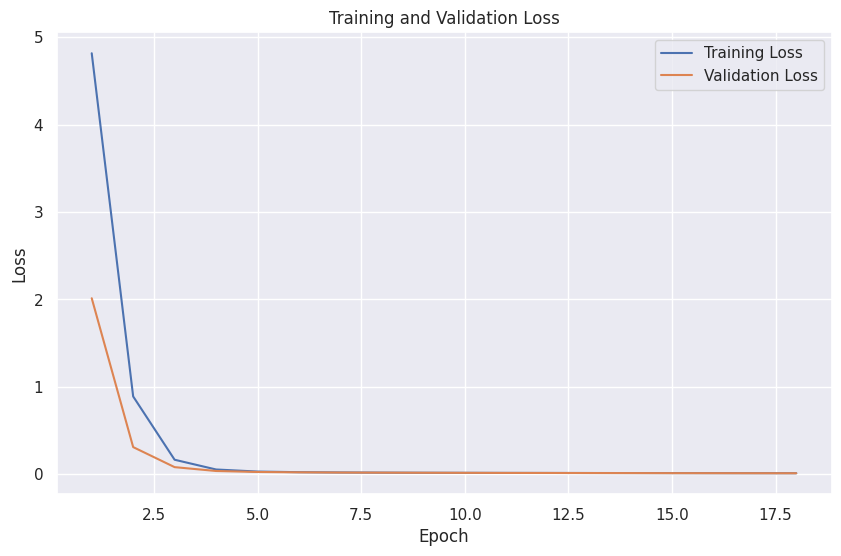

In [69]:
plt.figure(figsize=(10, 6))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [70]:
predicted = model.predict(X_test)
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])

 1/32 ━━━━━━━━━━━━━━━━━━━━ 9s 292ms/step

W0000 00:00:1713354281.983116     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


W0000 00:00:1713354282.293207     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [71]:
predicted

array([0, 0, 0, ..., 0, 0, 0])

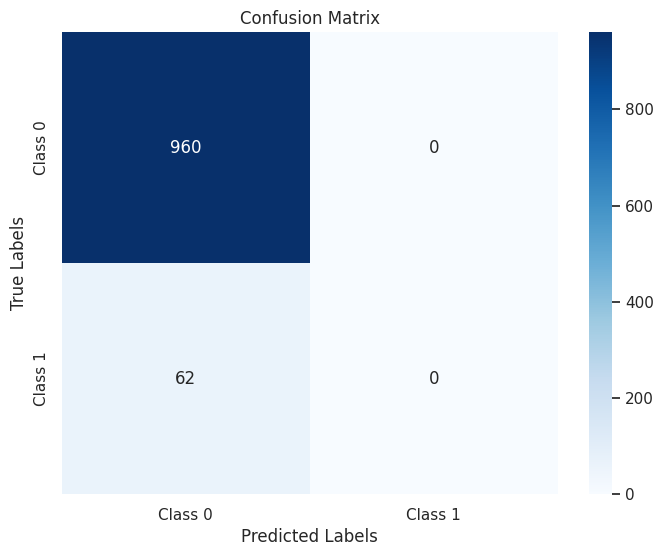

In [72]:
cm = confusion_matrix(y_test, predicted)

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [73]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



There is not enough class 1 data to predict well, maybe dataset owner adds some new info and we can improve our models. We can improve our scores using some other methods like fix skewness or weights. If you want to improve more you can try using smote more efficent way or np.log transformation etc. 
I hope you like the notebook, please vote, have a nice life !!